# Merced Fm pmag

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Calculate modern local magnetic field directions

In [2]:
Merced_lat = 37.87
Merced_lon = -122.27

local_dec, local_inc, _ = ipmag.igrf([2023, 0, Merced_lat, Merced_lon])
ipmag.igrf_print([local_dec, local_inc, _])

Declination: 13.457
Inclination: 61.322
Intensity: 48034.140 nT


In [3]:
dipole_dec = 0
dipole_inc = ipmag.inc_from_lat(Merced_lat)
dipole_inc

57.26009565500149

## Read in MagIC data files

In [4]:
specimen_data = pd.read_csv('../data/pmag/demag/specimens.txt', header=1, sep='\t')

### Filter by stratigraphic height to only include samples above 972 m in section

In [5]:
strat_heights = pd.read_csv('../data/pystrat_data/pmag_sample_heights.csv')
strat_heights

,Sample,strat_height,x,interpretation
0,MF2-6,1467.22,0,normal?
1,MF2-5,1467.05,0,normal
2,MF2-4,1467.00,0,normal
3,MF2-3,1465.70,0,normal?
4,MF2-2,1465.25,0,normal?
...,...,...,...,...
224,MF11-1,320.00,0,uncertain
225,MF10-4,84.90,0,uncertain
226,MF10-3,84.40,0,uncertain
227,MF10-2,84.30,0,uncertain


In [6]:
specimen_data = specimen_data.merge(strat_heights, how='left', left_on='sample', right_on='Sample')
specimen_data = specimen_data[specimen_data['strat_height'] > 972]

In [7]:
specimen_mc_gc = specimen_data[(specimen_data['dir_comp'] == 'mc') & (specimen_data['dir_tilt_correction'] == 0)].reset_index(drop=True)
specimen_mc_tc = specimen_data[(specimen_data['dir_comp'] == 'mc') & (specimen_data['dir_tilt_correction'] == 100)].reset_index(drop=True)

specimen_lc_gc = specimen_data[(specimen_data['dir_comp'] == 'lc') & (specimen_data['dir_tilt_correction'] == 0)].reset_index(drop=True)
specimen_lc_tc = specimen_data[(specimen_data['dir_comp'] == 'lc') & (specimen_data['dir_tilt_correction'] == 100)].reset_index(drop=True)

specimen_lt_gc = specimen_data[(specimen_data['dir_comp'] == 'lt') & (specimen_data['dir_tilt_correction'] == 0)].reset_index(drop=True)
specimen_lt_tc = specimen_data[(specimen_data['dir_comp'] == 'lt') & (specimen_data['dir_tilt_correction'] == 100)].reset_index(drop=True)

specimen_mc_gc.head()

,specimen,experiments,sample,dir_alpha95,dir_bfv_dec,dir_bfv_inc,dir_comp,dir_dec,dir_inc,dir_n_comps,...,result_quality,volume,weight,location,site,specimen_name,Sample,strat_height,x,interpretation
0,MF2-1a,MF2-1a_LP-DIR-AF,MF2-1,NaN,NaN,NaN,mc,253.8,66.0,2.0,...,g,NaN,NaN,Thornton Beach,MF2,MF2-1a,MF2-1,1465.08,0,normal
1,MF2-2a,MF2-2a_LP-DIR-AF,MF2-2,NaN,NaN,NaN,mc,338.4,50.7,1.0,...,g,NaN,NaN,Thornton Beach,MF2,MF2-2a,MF2-2,1465.25,0,normal?
2,MF2-3a,MF2-3a_LP-DIR-AF,MF2-3,NaN,NaN,NaN,mc,272.6,68.8,2.0,...,g,NaN,NaN,Thornton Beach,MF2,MF2-3a,MF2-3,1465.70,0,normal?
3,MF2-4a,MF2-4a_LP-DIR-AF,MF2-4,NaN,NaN,NaN,mc,322.5,67.4,1.0,...,g,NaN,NaN,Thornton Beach,MF2,MF2-4a,MF2-4,1467.00,0,normal
4,MF2-5a,MF2-5a_LP-DIR-AF,MF2-5,NaN,NaN,NaN,mc,305.2,71.2,2.0,...,g,NaN,NaN,Thornton Beach,MF2,MF2-5a,MF2-5,1467.05,0,normal


## Calculate summary statistics

In [8]:
specimen_mc_tc_dir_mean = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc'])
specimen_mc_gc_dir_mean = ipmag.fisher_mean(specimen_mc_gc['dir_dec'], specimen_mc_gc['dir_inc'])

specimen_lc_tc_dir_mean = ipmag.fisher_mean(specimen_lc_tc['dir_dec'], specimen_lc_tc['dir_inc'])
specimen_lc_gc_dir_mean = ipmag.fisher_mean(specimen_lc_gc['dir_dec'], specimen_lc_gc['dir_inc'])

specimen_lt_tc_dir_mean = ipmag.fisher_mean(specimen_lt_tc['dir_dec'], specimen_lt_tc['dir_inc'])
specimen_lt_gc_dir_mean = ipmag.fisher_mean(specimen_lt_gc['dir_dec'], specimen_lt_gc['dir_inc'])

#### plot low-coercivity component

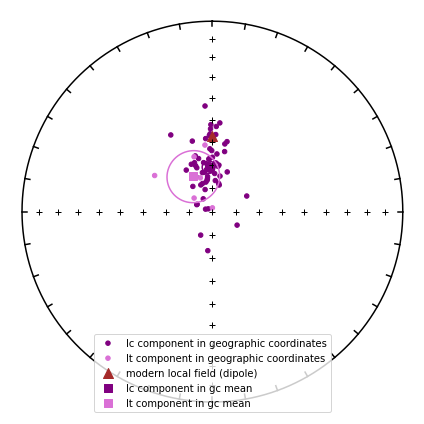

In [9]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(specimen_lc_gc['dir_dec'], specimen_lc_gc['dir_inc'], color='purple', label='lc component in geographic coordinates')
ipmag.plot_di(specimen_lt_gc['dir_dec'], specimen_lt_gc['dir_inc'], color='orchid', label='lt component in geographic coordinates')

# ipmag.plot_di(local_dec, local_inc, color='red', marker='*', markersize=200, label='modern local field (2023)')
ipmag.plot_di(dipole_dec, dipole_inc, color='brown', marker='^', markersize=100, label='modern local field (dipole)')

ipmag.plot_di_mean(specimen_lc_gc_dir_mean['dec'], specimen_lc_gc_dir_mean['inc'], specimen_lc_gc_dir_mean['alpha95'],
                   color='purple', marker='s', markersize=50, label='lc component in gc mean')
ipmag.plot_di_mean(specimen_lt_gc_dir_mean['dec'], specimen_lt_gc_dir_mean['inc'], specimen_lt_gc_dir_mean['alpha95'],
                   color='orchid', marker='s', markersize=50, label='lt component in gc mean')

plt.legend(loc=8)
plt.show()

### plot mid-coercivity component

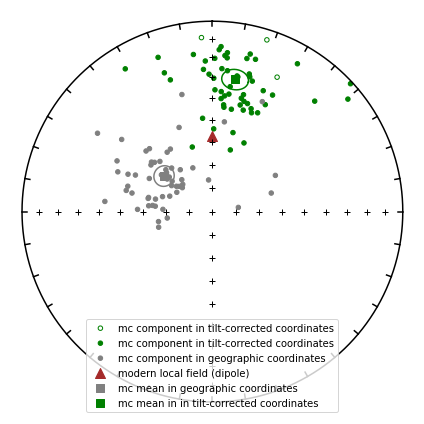

In [10]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc'], color='green', label='mc component in tilt-corrected coordinates')
ipmag.plot_di(specimen_mc_gc['dir_dec'], specimen_mc_gc['dir_inc'], color='grey', label='mc component in geographic coordinates')

# ipmag.plot_di(local_dec, local_inc, color='red', marker='*', markersize=200, label='modern local field (2023)')
ipmag.plot_di(dipole_dec, dipole_inc, color='brown', marker='^', markersize=100, label='modern local field (dipole)')

ipmag.plot_di_mean(specimen_mc_gc_dir_mean['dec'], specimen_mc_gc_dir_mean['inc'], specimen_mc_gc_dir_mean['alpha95'],
                   color='grey', marker='s', markersize=50, label='mc mean in geographic coordinates')
ipmag.plot_di_mean(specimen_mc_tc_dir_mean['dec'], specimen_mc_tc_dir_mean['inc'], specimen_mc_tc_dir_mean['alpha95'],
                   color='green', marker='s', markersize=50, label='mc mean in in tilt-corrected coordinates')

plt.legend(loc=8)
plt.show()

#### lc and mc in gc

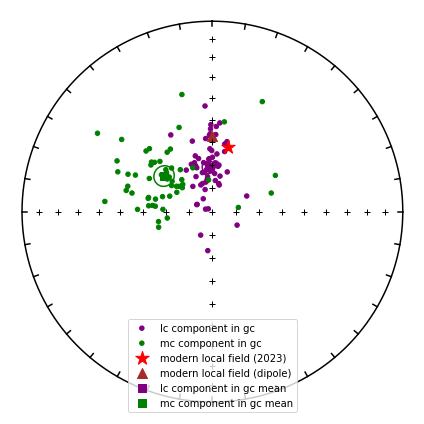

In [11]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(specimen_lc_gc['dir_dec'], specimen_lc_gc['dir_inc'], color='purple', label='lc component in gc')
ipmag.plot_di(specimen_mc_gc['dir_dec'], specimen_mc_gc['dir_inc'], color='green', label='mc component in gc')

ipmag.plot_di(local_dec, local_inc, color='red', marker='*', markersize=200, label='modern local field (2023)')
ipmag.plot_di(dipole_dec, dipole_inc, color='brown', marker='^', markersize=100, label='modern local field (dipole)')

ipmag.plot_di_mean(specimen_lc_gc_dir_mean['dec'], specimen_lc_gc_dir_mean['inc'], specimen_lc_gc_dir_mean['alpha95'],
                   color='purple', marker='s', markersize=50, label='lc component in gc mean')
ipmag.plot_di_mean(specimen_mc_gc_dir_mean['dec'], specimen_mc_gc_dir_mean['inc'], specimen_mc_gc_dir_mean['alpha95'],
                   color='green', marker='s', markersize=50, label='mc component in gc mean')

plt.legend(loc=8)
plt.show()

#### lc and mc in tc

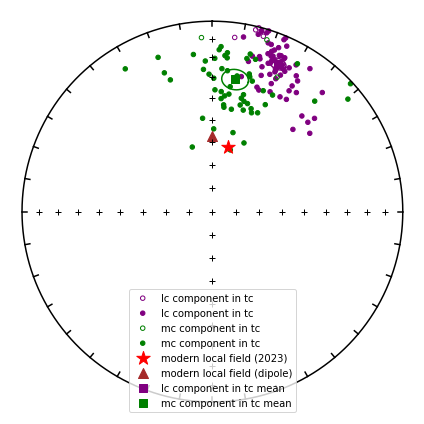

In [12]:
plt.figure(figsize=(6,6))
ipmag.plot_net()
ipmag.plot_di(specimen_lc_tc['dir_dec'], specimen_lc_tc['dir_inc'], color='purple', label='lc component in tc')
ipmag.plot_di(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc'], color='green', label='mc component in tc')

ipmag.plot_di(local_dec, local_inc, color='red', marker='*', markersize=200, label='modern local field (2023)')
ipmag.plot_di(dipole_dec, dipole_inc, color='brown', marker='^', markersize=100, label='modern local field (dipole)')

ipmag.plot_di_mean(specimen_lc_tc_dir_mean['dec'], specimen_lc_tc_dir_mean['inc'], specimen_lc_tc_dir_mean['alpha95'],
                   color='purple', marker='s', markersize=50, label='lc component in tc mean')
ipmag.plot_di_mean(specimen_mc_tc_dir_mean['dec'], specimen_mc_tc_dir_mean['inc'], specimen_mc_tc_dir_mean['alpha95'],
                   color='green', marker='s', markersize=50, label='mc component in tc mean')

plt.legend(loc=8)
plt.show()

In [16]:
specimen_mc_tc['dir_inc_unsquish_0.67'] = ipmag.unsquish(specimen_mc_tc['dir_inc'], 0.67)
specimen_mc_tc['dir_inc_unsquish_0.6'] = ipmag.unsquish(specimen_mc_tc['dir_inc'], 0.6)
specimen_mc_tc['dir_inc_unsquish_0.5'] = ipmag.unsquish(specimen_mc_tc['dir_inc'], 0.5)
specimen_mc_tc['dir_inc_unsquish_0.4'] = ipmag.unsquish(specimen_mc_tc['dir_inc'], 0.4)
specimen_mc_tc['dir_inc_unsquish_0.3'] = ipmag.unsquish(specimen_mc_tc['dir_inc'], 0.35)

specimen_mc_tc.head()

,specimen,experiments,sample,dir_alpha95,dir_bfv_dec,dir_bfv_inc,dir_comp,dir_dec,dir_inc,dir_n_comps,...,specimen_name,Sample,strat_height,x,interpretation,dir_inc_unsquish_0.67,dir_inc_unsquish_0.6,dir_inc_unsquish_0.5,dir_inc_unsquish_0.4,dir_inc_unsquish_0.3
0,MF2-1a,MF2-1a_LP-DIR-AF,MF2-1,NaN,NaN,NaN,mc,16.2,62.4,2.0,...,MF2-1a,MF2-1,1465.08,0,normal,70.696299,72.584798,75.351013,78.188797,79.630975
1,MF2-2a,MF2-2a_LP-DIR-AF,MF2-2,NaN,NaN,NaN,mc,5.5,20.0,1.0,...,MF2-2a,MF2-2,1465.25,0,normal?,28.512542,31.241715,36.052389,42.299862,46.120962
2,MF2-3a,MF2-3a_LP-DIR-AF,MF2-3,NaN,NaN,NaN,mc,14.6,54.7,2.0,...,MF2-3a,MF2-3,1465.70,0,normal?,64.620971,66.983065,70.505032,74.187041,76.081708
3,MF2-4a,MF2-4a_LP-DIR-AF,MF2-4,NaN,NaN,NaN,mc,14.9,36.6,1.0,...,MF2-4a,MF2-4,1467.00,0,normal,47.944620,51.065232,56.049566,61.693074,64.766651
4,MF2-5a,MF2-5a_LP-DIR-AF,MF2-5,NaN,NaN,NaN,mc,16.9,43.6,2.0,...,MF2-5a,MF2-5,1467.05,0,normal,54.870957,57.786526,62.298204,67.215579,69.819792


In [18]:
specimen_lc_gc_dir_mean_unsquish_low = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc_unsquish_0.67'])
specimen_lc_gc_dir_mean_unsquish_med = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc_unsquish_0.6'])
specimen_lc_gc_dir_mean_unsquish_high = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc_unsquish_0.5'])
specimen_lc_gc_dir_mean_unsquish_higher = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc_unsquish_0.4'])
specimen_lc_gc_dir_mean_unsquish_highest = ipmag.fisher_mean(specimen_mc_tc['dir_dec'], specimen_mc_tc['dir_inc_unsquish_0.3'])

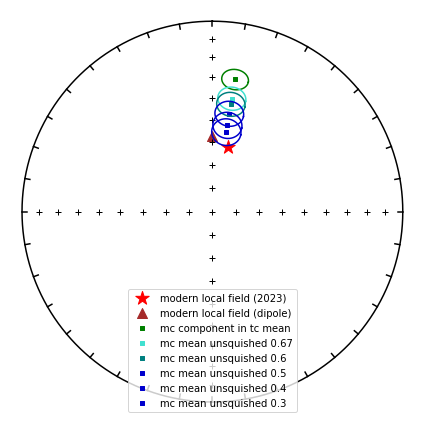

In [19]:
plt.figure(figsize=(6,6))
ipmag.plot_net()

ipmag.plot_di(local_dec, local_inc, color='red', marker='*', markersize=200, label='modern local field (2023)')
ipmag.plot_di(dipole_dec, dipole_inc, color='brown', marker='^', markersize=100, label='modern local field (dipole)')

ipmag.plot_di_mean(specimen_mc_tc_dir_mean['dec'], specimen_mc_tc_dir_mean['inc'], specimen_mc_tc_dir_mean['alpha95'],
                   color='green', marker='s', markersize=20, label='mc component in tc mean')
ipmag.plot_di_mean(specimen_lc_gc_dir_mean_unsquish_low['dec'], specimen_lc_gc_dir_mean_unsquish_low['inc'], specimen_lc_gc_dir_mean_unsquish_low['alpha95'],
                   color='turquoise', marker='s', markersize=20, label='mc mean unsquished 0.67')
ipmag.plot_di_mean(specimen_lc_gc_dir_mean_unsquish_med['dec'], specimen_lc_gc_dir_mean_unsquish_med['inc'], specimen_lc_gc_dir_mean_unsquish_med['alpha95'],
                   color='teal', marker='s', markersize=20, label='mc mean unsquished 0.6')
ipmag.plot_di_mean(specimen_lc_gc_dir_mean_unsquish_high['dec'], specimen_lc_gc_dir_mean_unsquish_high['inc'], specimen_lc_gc_dir_mean_unsquish_high['alpha95'],
                   color='mediumblue', marker='s', markersize=20, label='mc mean unsquished 0.5')
ipmag.plot_di_mean(specimen_lc_gc_dir_mean_unsquish_higher['dec'], specimen_lc_gc_dir_mean_unsquish_higher['inc'], specimen_lc_gc_dir_mean_unsquish_higher['alpha95'],
                   color='mediumblue', marker='s', markersize=20, label='mc mean unsquished 0.4')
ipmag.plot_di_mean(specimen_lc_gc_dir_mean_unsquish_highest['dec'], specimen_lc_gc_dir_mean_unsquish_highest['inc'], specimen_lc_gc_dir_mean_unsquish_highest['alpha95'],
                   color='mediumblue', marker='s', markersize=20, label='mc mean unsquished 0.3')

plt.legend(loc=8)
plt.show()